# Author: Arvin Arasteh

# Introduction

> This program receives your FORTNITE IGN as input

> Then the program fetches your FORTNITE data

> The program uses that data to create multiple graphs for visualization purposes

> Finally, the program prompts users to input their email if they want to recieve an email with their visualizations

# Packages and APIs

> FORTNITE TRACKER API

> Numpy

> Matplotlib

> PyPDF2

> Sys

> Os

> Email

> Smtplib

> SSL

# Links

> https://github.com/ArvinArasteh/FortniteStatsVisualization


In [ ]:
# Single Package Download
import sys
!{sys.executable} -m pip install PyPDF2

In [3]:
import sys
import subprocess

print('Downloading Necessary Packages...')
# Needed packages to download and run this program
listOfPackages = ['numpy', 'fortnite_python', 'matplotlib', 'PyPDF2']
for i in listOfPackages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', i])
    reqs = subprocess.check_output([sys.executable, '-m', 'pip','freeze'])
    installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
    #print(installed_packages)
    print('Completed Downloading', i)

print('Completed package downloading')

Completed Downloading numpy
Completed Downloading fortnite_python
Completed Downloading matplotlib
Completed Downloading PyPDF2
Completed package downloading


Enter your Username: TheFallDamage.
Data Collection Completed!
Graphing...
Graphing Completed!
Your Solo, Duo, and Squad stats are listed below: 


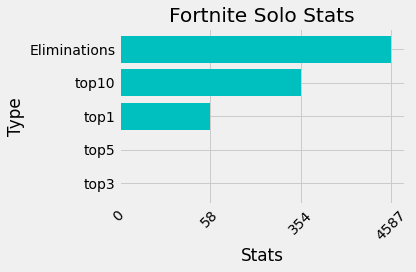

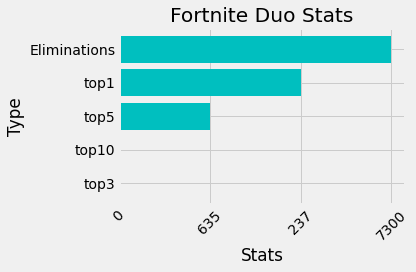

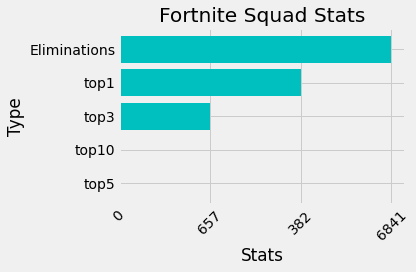

Would you like this stats be emailed to you? (Y/N) aarasteh@asu.edu
What is your Email address? aarasteh@asu.edu
Connecting to Server...
Connected Successfully
Sending Email...
An email of these stats have been sent to you. Thank you!


In [4]:
# Author: Arvin Arasteh
import numpy as np
from fortnite_python import Fortnite
from fortnite_python.domain import Mode
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
from matplotlib.backends.backend_pdf import PdfPages
from PyPDF2 import PdfFileMerger
import sys
import os
import email, smtplib, ssl
from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import time

api_key = os.getenv('FORTNITE_API_KEY')
fortnite_email = os.getenv('FORTNITE_EMAIL')
fortnite_password = os.getenv('FORTNITE_PASSWORD')

username = input("Enter your Username: ")

fortnite = Fortnite(api_key)
result = True
try:
    player = fortnite.player(username)
    result = True
except:
    result = False

if result == True:
    soloStats = player.get_stats(Mode.SOLO)
    soloTop1 = soloStats.top1
    soloTop3 = soloStats.top3
    soloTop5 = soloStats.top5
    soloTop10 = soloStats.top10
    soloKills = soloStats.kills

    soloDataDict = {
      "top3": soloTop3,
      "top5": soloTop5,
      "top1": soloTop1,
      "top10": soloTop10,
      "Eliminations": soloKills
    }


#     print(soloDataDict) # This was used for debugging

    solo_group_data = list(soloDataDict.values())
    solo_group_names = list(soloDataDict.keys())

    plt.rcParams.update({'figure.autolayout': True})
    plt.style.use('fivethirtyeight')
    fig, solo_ax = plt.subplots()
    solo_ax.barh(solo_group_names, solo_group_data, color='c')

    solo_ax.set( xlabel='Stats', ylabel='Type',
           title='Fortnite Solo Stats')
    labels = solo_ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='center')

    plt.savefig('Solo_Stats.pdf')

    duoStats = player.get_stats(Mode.DUO)
    duoTop1 = duoStats.top1
    duoTop3 = duoStats.top3
    duoTop5 = duoStats.top5
    duoTop10 = duoStats.top10
    duoKills = duoStats.kills

    duoDataDict = {
      "top3": duoTop3,
      "top10": duoTop10,
      "top5": duoTop5,
      "top1": duoTop1,
      "Eliminations": duoKills
    }

#     print(duoDataDict) #This was used for debugging

    duo_group_data = list(duoDataDict.values())
    duo_group_names = list(duoDataDict.keys())

    plt2.rcParams.update({'figure.autolayout': True})
    plt2.style.use('fivethirtyeight')
    fig2, ax_duo = plt2.subplots()
    ax_duo.barh(duo_group_names, duo_group_data, color='c')

    ax_duo.set( xlabel='Stats', ylabel='Type',
           title='Fortnite Duo Stats')
    labels2 = ax_duo.get_xticklabels()
    plt2.setp(labels2, rotation=45, horizontalalignment='center')

    plt2.savefig('Duo_Stats.pdf')

    squadStats = player.get_stats(Mode.SQUAD)
    squadTop1 = squadStats.top1
    squadTop3 = squadStats.top3
    squadTop5 = squadStats.top5
    squadTop10 = squadStats.top10
    squadKills = squadStats.kills


    squadDataDict = {
      "top5": squadTop5,
      "top10": squadTop10,
      "top3": squadTop3,
      "top1": squadTop1,
      "Eliminations": squadKills
    }

#     print(squadDataDict) #This was used for debugging

    squad_group_data = list(squadDataDict.values())
    squad_group_names = list(squadDataDict.keys())

    plt3.rcParams.update({'figure.autolayout': True})
    plt3.style.use('fivethirtyeight')
    fig3, ax_squad = plt3.subplots()
    ax_squad.barh(squad_group_names, squad_group_data, color='c')

    ax_squad.set( xlabel='Stats', ylabel='Type',
           title='Fortnite Squad Stats')
    labels3 = ax_squad.get_xticklabels()
    plt3.setp(labels3, rotation=45, horizontalalignment='center')

    plt3.savefig('Squad_Stats.pdf')
    
    print("Collecting Data...")
    time.sleep(4)
    print("Data Collection Completed!")
    time.sleep(3)
    print("Graphing...")
    time.sleep(3)
    print("Graphing Completed!")
    time.sleep(2)
    print("Your Solo, Duo, and Squad stats are listed below: ")
    plt.show()
    plt2.show()
    plt3.show()


    pdfs = ['Solo_Stats.pdf', 'Duo_Stats.pdf', 'Squad_Stats.pdf']

    merger = PdfFileMerger()

    for pdf in pdfs:
        merger.append(pdf)

    merger.write("YourFortniteStats.pdf")
    merger.close()


#     print() # This was used for debugging
    emailWanted = input("Would you like this stats be emailed to you? (Y/N) ")

    if emailWanted == 'N'or emailWanted == 'n' or emailWanted == 'no' or emailWanted == 'No':
        print("We are done! Thank you for using this program. See you later!")
    else:
        receiver_email  = input("What is your Email address? ")
        smtp_server = "smtp.gmail.com"
        port = 587   # For starttls
        subject = "Your Visualized Fortnite Stats!"
        body = "This email contains your visualized Fortnite stats. This is a project built using python for MAT394."
        message = MIMEMultipart()
        message["From"] = fortnite_email
        message["To"] = receiver_email
        message["Subject"] = subject
        message.attach(MIMEText(body, "plain"))
        filename = "YourFortniteStats.pdf"
        with open(filename, "rb") as attachment:
            part = MIMEBase("application", "octet-stream")
            part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header(
            "Content-Disposition",
            f"attachment; filename= {filename}",
        )
        message.attach(part)
        text = message.as_string()
        context = ssl.create_default_context()
        try:
            print("Connecting to Server...")
            time.sleep(4)
            print("Connected Successfully")
            time.sleep(2)
            print("Sending Email...")
            server = smtplib.SMTP(smtp_server,port)
            server.ehlo() 
            server.starttls(context=context) # Secure the connection
            server.ehlo()
            server.login(fortnite_email, fortnite_password)
            server.sendmail(fortnite_email, receiver_email, text)
        except Exception as e:
            # Print any error messages to stdout
            print("There was an error sending the email, please try again!")
        finally:
            server.quit()
            time.sleep(2)
            print("An email of these stats have been sent to you. Thank you!")
else:
    print("Error - This Username does not exist!")
